In [147]:
import spacy
nlp = spacy.load('en')

In [148]:
import pandas as pd
import re

In [149]:
clean_final = pd.read_csv("clean_final_news.csv", encoding = "utf8", index_col = 0)
clean_final = clean_final.reset_index()
clean_final.drop(['index'], 1, inplace=True)
clean_final

,author,published,text,domain_rank,site_url,spam_score,title,response,length
0,SAM TANENHAUS,2016-11-20T03:51:00.000+02:00,Privacy Policy Eisenhowers two terms bore this...,98.0,nytimes.com,0.000,Opinion: Donald Trump’s Art of the New Deal?,Not fake,949
1,NaN,2016-11-20T00:52:00.000+02:00,Can Trump Save Their Jobs? by Nelson D. Sc...,98.0,nytimes.com,0.000,Carrier Workers for Trump,Not fake,372
2,Kathleen Elkins,2016-11-20T06:18:00.000+02:00,"Tuesday, 18 Oct 2016 | 10:25 AM ET CNBC.com Ed...",767.0,cnbc.com,0.008,Tennis star Caroline Wozniacki shares the mone...,Not fake,386
3,JEFF SOMMER,2016-11-20T00:04:00.000+02:00,Continue reading the main story Yet it is poss...,98.0,nytimes.com,0.000,Strategies: It’s Not Just the White House. Cha...,Not fake,1005
4,James Rufus Koren,2016-11-20T02:42:00.000+02:00,Wells Fargo hit with new sanctions following f...,609.0,latimes.com,0.264,Wells Fargo hit with new sanctions following f...,Not fake,809
5,ROSS DOUTHAT,2016-11-20T02:30:00.000+02:00,Privacy Policy But liberal societies have alwa...,98.0,nytimes.com,0.000,The Crisis for Liberalism,Not fake,529
6,NaN,2016-11-20T03:09:00.000+02:00,Let friends in your social network know what y...,313.0,usatoday.com,0.000,"Joe Thomas Sr., 55, makes history as oldest pl...",Not fake,339
7,JOE COSCARELLI,2016-11-21T02:51:00.000+02:00,Privacy Policy A lot of people here tonight fe...,98.0,nytimes.com,0.000,Kanye West Calls Out Beyoncé and Praises Trump...,Not fake,340
8,Catherine Osborn,2016-11-21T05:09:00.000+02:00,Young Barbers In Brazil Are Cutting Away From ...,495.0,npr.org,0.000,Young Barbers In Brazil Are Cutting Away From ...,Not fake,57
9,cnn,2016-11-20T02:00:00.000+02:00,A passenger train goes off the track near the ...,81.0,cnn.com,0.079,Train derails in Northern India,Not fake,55


In [150]:
clean_final['binary_response'] = np.where(clean_final['response'] == 'Not fake', 0 , 1) 

In [151]:
clean_final.tail()

,author,published,text,domain_rank,site_url,spam_score,title,response,length,binary_response
34606,GoldRulesPaperDrools,2016-10-27T00:37:43.344+03:00,While we (the U.S. gov't) have been spending m...,2435.0,zerohedge.com,0.0,NaN,fake,70,1
34607,Ecclesia Militans,2016-10-27T00:37:44.612+03:00,All this non-GAAP activity should be disclosed...,2435.0,zerohedge.com,0.0,NaN,fake,79,1
34608,Kaiser Sousa,2016-10-27T00:07:00.000+03:00,when i awoke this morning the Dow Jones Propag...,2435.0,zerohedge.com,0.0,NaN,fake,430,1
34609,Keltner Channel Surf,2016-10-27T00:15:00.000+03:00,"Technical explanations are out of favor, so he...",2435.0,zerohedge.com,0.0,NaN,fake,128,1
34610,Keltner Channel Surf,2016-10-27T00:30:00.000+03:00,The weekly Wednesday Oil follies from 10:20 (s...,2435.0,zerohedge.com,0.0,NaN,fake,104,1


In [152]:
clean_final.text[6]

"Let friends in your social network know what you are reading about Facebook Email Joe Thomas Sr., 55, makes history as oldest player in Division I football Joe Thomas Sr. is 55 years old. He wanted to make history as the oldest player in college football history. Appearing for South Carolina State, the running back did by carrying for three yards. Post to Facebook Joe Thomas Sr., 55, makes history as oldest player in Division I football Joe Thomas Sr. is 55 years old. He wanted to make history as the oldest player in college football history. Appearing for South Carolina State, the running back did by carrying for three yards. Check out this story on USATODAY.com: http://usat.ly/2g8FHhN Cancel Send A link has been sent to your friend's email address. Posted! A link has been posted to your Facebook feed. Join the Nation's Conversation To find out more about Facebook commenting please read the Conversation Guidelines and FAQs Joe Thomas Sr., 55, makes history as oldest player in Divisio

In [153]:
clean_final.shape

(34611, 10)

In [154]:
len(x_text)

34611

In [155]:
# Update puncuation list in spacy
nlp.vocab["$"].is_punct = True
nlp.vocab["|"].is_punct = True
nlp.vocab["+"].is_punct = True
nlp.vocab["<"].is_punct = True
nlp.vocab[">"].is_punct = True
nlp.vocab["="].is_punct = True
nlp.vocab["^"].is_punct = True
nlp.vocab["`"].is_punct = True
nlp.vocab["~"].is_punct = True

# Pre-processing

In [156]:
# Convert text and response to array 
x_text = clean_final.text.values
y_response = clean_final.binary_response.values

In [157]:
for idx in range(len(x_text)):
    x_text[idx] = re.sub(r'@([A-Za-z0-9_]+)', "", str(x_text[idx]))

In [158]:
for idx in range(len(x_text)):
    x_text[idx] = re.sub(r"(https|http)\S+", "", str(x_text[idx]))

In [159]:
# helper function to eliminate tokens that are pure punctuation, whitespace, or stopword
# can be updated based on desired filtering 

def process_txt(token):
    return token.is_punct or token.is_space or token.is_stop or token.like_num

In [160]:
# function to take array of articles and turn them into nested list of tokens
def lemmatize_txt(array):
    lemma = []
    
    for doc in nlp.pipe(array, batch_size=50,
                        n_threads=-1):
        if doc.is_parsed:
            lemma.append([n.lemma_ for n in doc if not process_txt(n)])
        
        else:
            lemma.append(None)
    
    return lemma

In [161]:
# function to recombine nested list of tokens into full articles 
def lemma_combine(lis):
    parsed_articles = []
    
    for i in range(len(lis)):
        concat_art = ' '.join(lis[i])
        parsed_articles.append(concat_art)
    
    return parsed_articles

In [162]:
# function to match "cleaned" text back up with response variable
def zip_response(observations, response):
    response = response.tolist()
    
    return list(zip(observations, response))

In [163]:
# Create nested list of tokens for each article
lem = lemmatize_txt(x_text)

# Text Processing

In [164]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [165]:
# Create bi-grams for our text 
phrases = Phrases(lem)
bigram = Phraser(phrases)
bigram_lem = list(bigram[lem])

In [166]:
# Create tri-grams for our text
phrases2 = Phrases(bigram_lem)
trigram = Phraser(phrases2)
trigram_lem = list(trigram[bigram_lem])

In [167]:
# Recombine full article text for unigrams, bigrams, and trigrams
uni_lem_comb = lemma_combine(lem)
bi_lem_comb = lemma_combine(bigram_lem)
tri_lem_comb = lemma_combine(trigram_lem)

In [29]:
# zipped_tri = zip_response(tri_lem_comb,y_response)
# test_x = [x[0] for x in zipped_tri if x[1] == 'Not fake']
# test_y = [x[0] for x in zipped_tri if x[1] == 'fake']
# len(test_y)

# Modeling

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import time

In [194]:
from __future__ import print_function
import sklearn.metrics

def evaluate_model(clf, actual, predicted):
    """Scores a model with the created train and test sets."""
    train_loss = metrics.log_loss(y_train, clf.predict_proba(x_train))
    test_loss = metrics.log_loss(y_test, clf.predict_proba(x_test))
    matrix = confusion_matrix(actual, predicted)
    report = metrics.classification_report(actual, predicted, target_names = ['0', '1'])
    print("Train score:", train_loss)
    print("Test score:", test_loss)
    print('Confusion Matrix:\n', matrix)
    print('Classification report:\n', report)

    return test_loss

In [170]:
# Split test and train data using trigram text
x_train, x_test, y_train, y_test = train_test_split(tri_lem_comb, y_response, test_size = 0.2, stratify = y_response)

# Naive Bayes: Multinomial

In [174]:
# Set up pipeline to run TFIDF and Naive Bayes
text_pipe_nb = Pipeline([('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [175]:
%time
text_pipe_nb.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...True,
        vocabulary=None)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [33]:
# Use pipeline to predict on train data and find accuracy
# predicted_train = text_pipe.predict(x_train)
# np.mean(predicted_train == y_train)

0.82877058653568336

In [34]:
# Use pipeline to predict on train data and find accuracy
# predicted_test = text_pipe.predict(x_test)
# np.mean(predicted_test == y_test)

0.80528672540806012

In [176]:
# Set up grid search to find best parameters for TFIDF and MNB
parameters = {'tfidf__max_df': (0.75, 0.80, 0.85, 0.90, 0.95, 1.0),\
              'tfidf__min_df': (0.001,0.01,0.1),\
              'nb__alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)}

In [177]:
# Establish grid search instance
gs_nb = GridSearchCV(text_pipe_nb, parameters, n_jobs=-1, scoring = 'f1')

In [180]:
%%time

gs_nb = gs_nb.fit(x_train, y_train)

CPU times: user 29.6 s, sys: 26.2 s, total: 55.8 s
Wall time: 20min 21s


In [181]:
# Check best parameters
gs_nb.best_params_

{'nb__alpha': 1e-05, 'tfidf__max_df': 0.75, 'tfidf__min_df': 0.001}

In [182]:
# Predict on test data and display accuracy
nb_predicted = gs_nb.predict(x_test)

In [195]:
%%time
# Get more detailed performance metrics
evaluate_model(gs_nb, y_test, nb_predicted)

Train score: 0.175018740819
Test score: 0.20938011173
Confusion Matrix:
 [[4473  242]
 [ 392 1816]]
Classification report:
              precision    recall  f1-score   support

          0       0.92      0.95      0.93      4715
          1       0.88      0.82      0.85      2208

avg / total       0.91      0.91      0.91      6923

CPU times: user 10.2 s, sys: 134 ms, total: 10.3 s
Wall time: 10.3 s


0.20938011172993537

In [129]:
# print('confusion_matrix:\n', confusion_matrix(y_test,gs_predicted))

confusion_matrix:
 [[4486  229]
 [ 373 1835]]


In [196]:
train_loss = metrics.roc_auc_score(y_train, gs_nb.predict(x_train))
test_loss = metrics.roc_auc_score(y_test, gs_nb.predict(x_test))
print("Train score:", train_loss)
print("Test score:", test_loss)

Train score: 0.907295322328
Test score: 0.885569105691


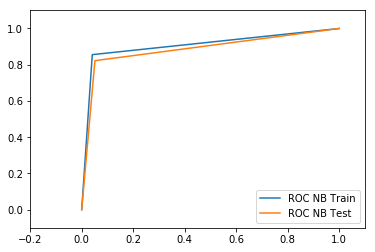

In [197]:
A=sklearn.metrics.roc_curve(y_train,gs_nb.predict(x_train),pos_label=1)
B=sklearn.metrics.roc_curve(y_test,gs_nb.predict(x_test),pos_label=1)

plt.plot(A[0],A[1],label='ROC NB Train')
plt.plot(B[0],B[1],label='ROC NB Test')
plt.xlim((-0.2,1.1))
plt.ylim((-0.1,1.1))
plt.legend(loc=4)

In [237]:
filename = 'nb_model.sav'
pickle.dump(gs_nb, open(filename, 'wb'))

# Logistic Regression

In [209]:
# Split test and train data using trigram text
x_train, x_test, y_train, y_test = train_test_split(tri_lem_comb, y_response, test_size = 0.2, stratify = y_response)

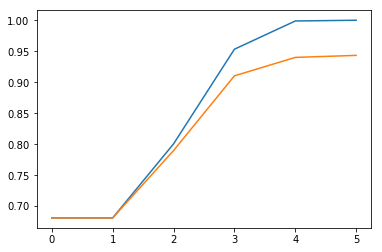

In [210]:
import sklearn.learning_curve
from sklearn.linear_model import LogisticRegression
% matplotlib inline
import matplotlib.pyplot as plt
logit = TfidfVectorizer()

x_train_log = logit.fit_transform(x_train)

C_values = [0.001, 0.01,0.1,1,10,100]

train_scores, test_scores = sklearn.learning_curve.validation_curve(
    LogisticRegression(), x_train_log, y_train, 'C', C_values)
plt.plot(np.mean(train_scores, axis=1), label='Train')
plt.plot(np.mean(test_scores, axis=1), label='Test')

In [211]:
text_pipe_lr = Pipeline([('tfidf', TfidfVectorizer()), ('lr', LogisticRegression())])

In [212]:
%%time
text_pipe_lr.fit(x_train, y_train)

CPU times: user 11.5 s, sys: 292 ms, total: 11.8 s
Wall time: 11.8 s


Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [213]:
lr_parameters = {'tfidf__max_df': (0.75, 0.80, 0.85, 0.90, 0.95, 1.0),\
             'tfidf__min_df': (0.001,0.01,0.1),\
             'lr__penalty': ('l1','l2'),\
               'lr__C': (0.01, 0.1, 1),\
               'lr__class_weight': (None, 'balanced')}

In [214]:
gs_lr = GridSearchCV(text_pipe_lr, lr_parameters, n_jobs=-1, scoring='f1')

In [208]:
len(x_train)

27688

In [215]:
%%time
gs_lr = gs_lr.fit(x_train, y_train)

/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/m

KeyboardInterrupt: 

In [63]:
gs_lr.best_params_

{'lr__C': 1,
 'lr__class_weight': None,
 'lr__penalty': 'l1',
 'tfidf__max_df': 0.9,
 'tfidf__min_df': 0.001}

In [68]:
lr_predicted = gs_lr.predict(x_test)

Train score: 0.179119437437
Test score: 0.197408087036


In [ ]:
evaluate_model(gs_lr, y_test, lr_predicted)

In [76]:
gs_lr.predict_proba(x_test)[:, 1].shape

(6923,)

In [73]:
y_test.shape

(6923,)

In [132]:
y_test[:10]

array(['fake', 'Not fake', 'Not fake', 'Not fake', 'Not fake', 'Not fake',
       'fake', 'Not fake', 'Not fake', 'Not fake'], dtype=object)

# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
text_pipe_rf = Pipeline([('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

In [ ]:
%%time
text_pipe_rf.fit(x_train, y_train)

In [82]:
rf_parameters = {'tfidf__min_df': (0.75, 0.80, 0.85, 0.90, 0.95, 1.0),\
             'tfidf__min_df': (0.001,0.01,0.1),\
            'rf__n_estimators': (50, 100, 200),\
                 'rf__criterion': ('gini', 'entropy'),\
               'rf__class_weight': (None, 'balanced')}

In [83]:
gs_rf = GridSearchCV(text_pipe_rf, rf_parameters, n_jobs=-1, scoring='f1')

In [ ]:
%% time
gs_rf = gs_rf.fit(x_train, y_train)

In [ ]:
gs_rf.best_params_

In [ ]:
rf_predicted = gs_rf.predict(x_test)

In [94]:
evaluate_model(gs_rf, y_test, rf_predicted)

Train score: 0.0921773808974
Test score: 0.298432721433



0.29843272143251104

In [90]:
gs_rf.predict(x_train)

array(['Not fake', 'Not fake', 'Not fake', ..., 'fake', 'Not fake',
       'Not fake'], dtype=object)

# Gradient Boosting

In [216]:
from sklearn.ensemble import GradientBoostingClassifier
text_pipe_gbt = Pipeline([('tfidf', TfidfVectorizer()), ('gbt', GradientBoostingClassifier())])

In [217]:
%%time
text_pipe_gbt.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))])

In [218]:
gbt_parameters = {'tfidf__min_df': (0.75, 0.80, 0.85, 0.90, 0.95, 1.0),\
             'tfidf__min_df': (0.001,0.01,0.1),\
            'gbt__n_estimators': (50, 100, 200)}

In [219]:
gs_gbt = GridSearchCV(text_pipe_gbt, gbt_parameters, n_jobs=-1, scoring='f1')

In [221]:
%%time
gs_gbt = gs_gbt.fit(x_train, y_train)

JoblibTypeError: JoblibTypeError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/runpy.py in _run_code(code=<code object <module> at 0x10cb3ae40, file "/Use...3.5/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/mikeghoul/anaconda/envs/py35/lib/python3....ges/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/mikeg.../python3.5/site-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x10cb3ae40, file "/Use...3.5/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/mikeghoul/anaconda/envs/py35/lib/python3....ges/__pycache__/ipykernel_launcher.cpython-35.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.5/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/mikeg.../python3.5/site-packages/ipykernel/kernelapp.py'>, 'sys': <module 'sys' (built-in)>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()
     17 
     18 
     19 
     20 

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '%%time\ngs_gbt = gs_gbt.fit(x_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 9, 6, 20, 37, 4, 685018, tzinfo=datetime.timezone.utc), 'msg_id': '18DADD79228F46FA9D1484D2DD11DDE0', 'msg_type': 'execute_request', 'session': 'F8998EAA59024FEA83AC48F899FEC55D', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '18DADD79228F46FA9D1484D2DD11DDE0', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'F8998EAA59024FEA83AC48F899FEC55D']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '%%time\ngs_gbt = gs_gbt.fit(x_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 9, 6, 20, 37, 4, 685018, tzinfo=datetime.timezone.utc), 'msg_id': '18DADD79228F46FA9D1484D2DD11DDE0', 'msg_type': 'execute_request', 'session': 'F8998EAA59024FEA83AC48F899FEC55D', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '18DADD79228F46FA9D1484D2DD11DDE0', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'F8998EAA59024FEA83AC48F899FEC55D'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '%%time\ngs_gbt = gs_gbt.fit(x_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 9, 6, 20, 37, 4, 685018, tzinfo=datetime.timezone.utc), 'msg_id': '18DADD79228F46FA9D1484D2DD11DDE0', 'msg_type': 'execute_request', 'session': 'F8998EAA59024FEA83AC48F899FEC55D', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '18DADD79228F46FA9D1484D2DD11DDE0', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='%%time\ngs_gbt = gs_gbt.fit(x_train, y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '%%time\ngs_gbt = gs_gbt.fit(x_train, y_train)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('%%time\ngs_gbt = gs_gbt.fit(x_train, y_train)',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('%%time\ngs_gbt = gs_gbt.fit(x_train, y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='%%time\ngs_gbt = gs_gbt.fit(x_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-221-b35b073dc8e5>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1d7429fd0, execution_..._before_exec=None error_in_exec=None result=None>)
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])
   2826                 code = compiler(mod, cell_name, "single")
-> 2827                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x18d6e6420, file "<ipython-input-221-b35b073dc8e5>", line 1>
        result = <ExecutionResult object at 1d7429fd0, execution_..._before_exec=None error_in_exec=None result=None>
   2828                     return True
   2829 
   2830             # Flush softspace
   2831             if softspace(sys.stdout, 0):

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x18d6e6420, file "<ipython-input-221-b35b073dc8e5>", line 1>, result=<ExecutionResult object at 1d7429fd0, execution_..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x18d6e6420, file "<ipython-input-221-b35b073dc8e5>", line 1>
        self.user_global_ns = {'A': (array([ 0.        ,  0.04104794,  1.        ]), array([ 0.        ,  0.85563859,  1.        ]), array([2, 1, 0])), 'B': (array([ 0.        ,  0.05132556,  1.        ]), array([ 0.        ,  0.82246377,  1.        ]), array([2, 1, 0])), 'C_values': [0.001, 0.01, 0.1, 1, 10, 100], 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import spacy\nnlp = spacy.load('en')", 'import pandas as pd\nimport re', 'clean_final = pd.read_csv("clean_final_news.csv"...inal.drop([\'index\'], 1, inplace=True)\nclean_final', 'clean_final.text[6]', 'clean_final.shape', '# Convert text and response to array \nx_text = c...t.values\ny_response = clean_final.response.values', 'for idx in range(len(x_text)):\n    x_text[idx] = re.sub(r\'@([A-Za-z0-9_]+)\', "", str(x_text[idx]))', 'for idx in range(len(x_text)):\n    x_text[idx] = re.sub(r"(https|http)\\S+", "", str(x_text[idx]))', 'len(x_text)', '# Update puncuation list in spacy\nnlp.vocab["$"]..."].is_punct = True\nnlp.vocab["~"].is_punct = True', '# helper function to eliminate tokens that are p...token.is_space or token.is_stop or token.like_num', '# function to take array of articles and turn th...         lemma.append(None)\n    \n    return lemma', '# function to recombine nested list of tokens in...ppend(concat_art)\n    \n    return parsed_articles', '# function to match "cleaned" text back up with ...    \n    return list(zip(observations, response))', '# Lemmatize text\nlem = lemmatize_txt(x_text)', 'from gensim.models import Phrases\nfrom gensim.models.phrases import Phraser', '# Create bi-grams for our text \nphrases = Phrase...= Phraser(phrases)\nbigram_lem = list(bigram[lem])', '# Create tri-grams for our text\nphrases2 = Phras...phrases2)\ntrigram_lem = list(trigram[bigram_lem])', '# Recombine full article text for unigrams, bigr...am_lem)\ntri_lem_comb = lemma_combine(trigram_lem)', ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {3:                                                 ...610                1  

[34611 rows x 10 columns], 4: 'Let friends in your social network know what you...ateAthletic . @wachfox pic.twitter.com/eyoSMpZDBK', 5: (34611, 9), 9: 34611, 32: Pipeline(steps=[('tfidf', TfidfVectorizer(analyz...B(alpha=1.0, class_prior=None, fit_prior=True))]), 33: 0.82877058653568336, 34: 0.80528672540806012, 42: {'clf__alpha': 1e-05, 'tfidf__max_df': 0.75, 'tfidf__min_df': 0.001}, 43: 0.90931089280554755, 44: 0.91304347826086951, ...}, 'Phraser': <class 'gensim.models.phrases.Phraser'>, ...}
        self.user_ns = {'A': (array([ 0.        ,  0.04104794,  1.        ]), array([ 0.        ,  0.85563859,  1.        ]), array([2, 1, 0])), 'B': (array([ 0.        ,  0.05132556,  1.        ]), array([ 0.        ,  0.82246377,  1.        ]), array([2, 1, 0])), 'C_values': [0.001, 0.01, 0.1, 1, 10, 100], 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import spacy\nnlp = spacy.load('en')", 'import pandas as pd\nimport re', 'clean_final = pd.read_csv("clean_final_news.csv"...inal.drop([\'index\'], 1, inplace=True)\nclean_final', 'clean_final.text[6]', 'clean_final.shape', '# Convert text and response to array \nx_text = c...t.values\ny_response = clean_final.response.values', 'for idx in range(len(x_text)):\n    x_text[idx] = re.sub(r\'@([A-Za-z0-9_]+)\', "", str(x_text[idx]))', 'for idx in range(len(x_text)):\n    x_text[idx] = re.sub(r"(https|http)\\S+", "", str(x_text[idx]))', 'len(x_text)', '# Update puncuation list in spacy\nnlp.vocab["$"]..."].is_punct = True\nnlp.vocab["~"].is_punct = True', '# helper function to eliminate tokens that are p...token.is_space or token.is_stop or token.like_num', '# function to take array of articles and turn th...         lemma.append(None)\n    \n    return lemma', '# function to recombine nested list of tokens in...ppend(concat_art)\n    \n    return parsed_articles', '# function to match "cleaned" text back up with ...    \n    return list(zip(observations, response))', '# Lemmatize text\nlem = lemmatize_txt(x_text)', 'from gensim.models import Phrases\nfrom gensim.models.phrases import Phraser', '# Create bi-grams for our text \nphrases = Phrase...= Phraser(phrases)\nbigram_lem = list(bigram[lem])', '# Create tri-grams for our text\nphrases2 = Phras...phrases2)\ntrigram_lem = list(trigram[bigram_lem])', '# Recombine full article text for unigrams, bigr...am_lem)\ntri_lem_comb = lemma_combine(trigram_lem)', ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {3:                                                 ...610                1  

[34611 rows x 10 columns], 4: 'Let friends in your social network know what you...ateAthletic . @wachfox pic.twitter.com/eyoSMpZDBK', 5: (34611, 9), 9: 34611, 32: Pipeline(steps=[('tfidf', TfidfVectorizer(analyz...B(alpha=1.0, class_prior=None, fit_prior=True))]), 33: 0.82877058653568336, 34: 0.80528672540806012, 42: {'clf__alpha': 1e-05, 'tfidf__max_df': 0.75, 'tfidf__min_df': 0.001}, 43: 0.90931089280554755, 44: 0.91304347826086951, ...}, 'Phraser': <class 'gensim.models.phrases.Phraser'>, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
/Users/mikeghoul/Desktop/Data Science Bootcamp/Projects/Capstone/<ipython-input-221-b35b073dc8e5> in <module>()
----> 1 
      2 
      3 
      4 
      5 
      6 get_ipython().run_cell_magic('time', '', 'gs_gbt = gs_gbt.fit(x_train, y_train)')
      7 
      8 
      9 
     10 

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/interactiveshell.py in run_cell_magic(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, magic_name='time', line='', cell='gs_gbt = gs_gbt.fit(x_train, y_train)')
   2110             # This will need to be updated if the internal calling logic gets
   2111             # refactored, or else we'll be expanding the wrong variables.
   2112             stack_depth = 2
   2113             magic_arg_s = self.var_expand(line, stack_depth)
   2114             with self.builtin_trap:
-> 2115                 result = fn(magic_arg_s, cell)
        result = undefined
        fn = <bound method ExecutionMagics.time of <IPython.core.magics.execution.ExecutionMagics object>>
        magic_arg_s = ''
        cell = 'gs_gbt = gs_gbt.fit(x_train, y_train)'
   2116             return result
   2117 
   2118     def find_line_magic(self, magic_name):
   2119         """Find and return a line magic by name.

...........................................................................
/Users/mikeghoul/Desktop/Data Science Bootcamp/Projects/Capstone/<decorator-gen-59> in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line='', cell='gs_gbt = gs_gbt.fit(x_train, y_train)', local_ns=None)
      1 
----> 2 
      3 
      4 
      5 
      6 
      7 
      8 
      9 
     10 

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/magic.py in <lambda>(f=<function ExecutionMagics.time>, *a=(<IPython.core.magics.execution.ExecutionMagics object>, '', 'gs_gbt = gs_gbt.fit(x_train, y_train)', None), **k={})
    183     validate_type(magic_kind)
    184 
    185     # This is a closure to capture the magic_kind.  We could also use a class,
    186     # but it's overkill for just that one bit of state.
    187     def magic_deco(arg):
--> 188         call = lambda f, *a, **k: f(*a, **k)
        f = <function ExecutionMagics.time>
        a = (<IPython.core.magics.execution.ExecutionMagics object>, '', 'gs_gbt = gs_gbt.fit(x_train, y_train)', None)
        k = {}
    189 
    190         if callable(arg):
    191             # "Naked" decorator call (just @foo, no args)
    192             func = arg

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/IPython/core/magics/execution.py in time(self=<IPython.core.magics.execution.ExecutionMagics object>, line='', cell='gs_gbt = gs_gbt.fit(x_train, y_train)', local_ns=None)
   1180             st = clock2()
   1181             out = eval(code, glob, local_ns)
   1182             end = clock2()
   1183         else:
   1184             st = clock2()
-> 1185             exec(code, glob, local_ns)
        code = <code object <module> at 0x1e776b780, file "<timed exec>", line 1>
        glob = {'A': (array([ 0.        ,  0.04104794,  1.        ]), array([ 0.        ,  0.85563859,  1.        ]), array([2, 1, 0])), 'B': (array([ 0.        ,  0.05132556,  1.        ]), array([ 0.        ,  0.82246377,  1.        ]), array([2, 1, 0])), 'C_values': [0.001, 0.01, 0.1, 1, 10, 100], 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "import spacy\nnlp = spacy.load('en')", 'import pandas as pd\nimport re', 'clean_final = pd.read_csv("clean_final_news.csv"...inal.drop([\'index\'], 1, inplace=True)\nclean_final', 'clean_final.text[6]', 'clean_final.shape', '# Convert text and response to array \nx_text = c...t.values\ny_response = clean_final.response.values', 'for idx in range(len(x_text)):\n    x_text[idx] = re.sub(r\'@([A-Za-z0-9_]+)\', "", str(x_text[idx]))', 'for idx in range(len(x_text)):\n    x_text[idx] = re.sub(r"(https|http)\\S+", "", str(x_text[idx]))', 'len(x_text)', '# Update puncuation list in spacy\nnlp.vocab["$"]..."].is_punct = True\nnlp.vocab["~"].is_punct = True', '# helper function to eliminate tokens that are p...token.is_space or token.is_stop or token.like_num', '# function to take array of articles and turn th...         lemma.append(None)\n    \n    return lemma', '# function to recombine nested list of tokens in...ppend(concat_art)\n    \n    return parsed_articles', '# function to match "cleaned" text back up with ...    \n    return list(zip(observations, response))', '# Lemmatize text\nlem = lemmatize_txt(x_text)', 'from gensim.models import Phrases\nfrom gensim.models.phrases import Phraser', '# Create bi-grams for our text \nphrases = Phrase...= Phraser(phrases)\nbigram_lem = list(bigram[lem])', '# Create tri-grams for our text\nphrases2 = Phras...phrases2)\ntrigram_lem = list(trigram[bigram_lem])', '# Recombine full article text for unigrams, bigr...am_lem)\ntri_lem_comb = lemma_combine(trigram_lem)', ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {3:                                                 ...610                1  

[34611 rows x 10 columns], 4: 'Let friends in your social network know what you...ateAthletic . @wachfox pic.twitter.com/eyoSMpZDBK', 5: (34611, 9), 9: 34611, 32: Pipeline(steps=[('tfidf', TfidfVectorizer(analyz...B(alpha=1.0, class_prior=None, fit_prior=True))]), 33: 0.82877058653568336, 34: 0.80528672540806012, 42: {'clf__alpha': 1e-05, 'tfidf__max_df': 0.75, 'tfidf__min_df': 0.001}, 43: 0.90931089280554755, 44: 0.91304347826086951, ...}, 'Phraser': <class 'gensim.models.phrases.Phraser'>, ...}
        local_ns = None
   1186             end = clock2()
   1187             out = None
   1188         wall_end = wtime()
   1189         # Compute actual times and report

...........................................................................
/Users/mikeghoul/Desktop/Data Science Bootcamp/Projects/Capstone/<timed exec> in <module>()
----> 1 
      2 
      3 
      4 
      5 
      6 
      7 
      8 
      9 
     10 

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...train_score=True,
       scoring='f1', verbose=0), X=['zurich nov_reuters spotlight find cancer cure sp...create value contract future editing anna willard', 'post_october daisy_luther oh loretta ill_bet ag_..._word share_article_favorite_social network_share', 'mike_coppinger_november 10:02 pm_follow las_vega...ig butt everyone go saturday ap_photo_john_locher', "man nostalgic simpler era hour_ago close_vol_iss...n_onion 's_newsletter_spam filter_daily_headlines", 'john_wall approach free_throw_line early quarter...ble point_rebound morris contribute point_rebound', "white_house_press_secretary josh_earnest_say mon...president_obama send_delegation tyrant 's funeral", 'social_care chancellor wrong social_care_funding...drew_marr sunday_november_gmt_view sharing_option', 'hard working american vs. government_parasite mi...mment work soup_kitchen day maybe gary2s approach', 'cnn.com_div_class="banner_id="cnn_300x250_sync_f...draiser run event host constance milstein section', 'gold_coast target good_friend afl_draft strategy...jor reason interested join battle queensland club', '1940s baghdad 1980s newcastle archive urban chan...nuszka guardianwitness_facebook_twitter_pinterest', 'jessie_karangu november 7:37 pm michael_jordan a...am time president beloved chicago bull dream team', 'swipe_leave_right attack clones translate chines... jedi council folks crooked yoda say whitemamba83', 'michael cliff waters lead analyst energy_transfe..._environmental science_follow_adventure instagram', 'janet_yellen stay president trump 12:53 pm_est i...mber schmidt not think google successful november', 'obama quickly appeal_court_ruling stop new_overt...ss intend follow_opinion_section twitter_facebook', '1:30_pm follow josh_norman push cowboys_quarterb... injure_reserve ne good performance position post', 'enlarge_image aaron_lee tasjan perform world_caf...uhaus vuhaus episode_playlist_world_cafe 11/29/16', 'washington_post live election_night view party e...dvertise_washington post_video_buildnumber:0299c0', 'sharpton try dismiss say oh talk heavily edit vi..._not point speck brother eye acknowledge log boom', ...], y=array([0, 1, 0, ..., 0, 1, 0]), groups=None)
    940 
    941         groups : array-like, with shape (n_samples,), optional
    942             Group labels for the samples used while splitting the dataset into
    943             train/test set.
    944         """
--> 945         return self._fit(X, y, groups, ParameterGrid(self.param_grid))
        self._fit = <bound method BaseSearchCV._fit of GridSearchCV(...rain_score=True,
       scoring='f1', verbose=0)>
        X = ['zurich nov_reuters spotlight find cancer cure sp...create value contract future editing anna willard', 'post_october daisy_luther oh loretta ill_bet ag_..._word share_article_favorite_social network_share', 'mike_coppinger_november 10:02 pm_follow las_vega...ig butt everyone go saturday ap_photo_john_locher', "man nostalgic simpler era hour_ago close_vol_iss...n_onion 's_newsletter_spam filter_daily_headlines", 'john_wall approach free_throw_line early quarter...ble point_rebound morris contribute point_rebound', "white_house_press_secretary josh_earnest_say mon...president_obama send_delegation tyrant 's funeral", 'social_care chancellor wrong social_care_funding...drew_marr sunday_november_gmt_view sharing_option', 'hard working american vs. government_parasite mi...mment work soup_kitchen day maybe gary2s approach', 'cnn.com_div_class="banner_id="cnn_300x250_sync_f...draiser run event host constance milstein section', 'gold_coast target good_friend afl_draft strategy...jor reason interested join battle queensland club', '1940s baghdad 1980s newcastle archive urban chan...nuszka guardianwitness_facebook_twitter_pinterest', 'jessie_karangu november 7:37 pm michael_jordan a...am time president beloved chicago bull dream team', 'swipe_leave_right attack clones translate chines... jedi council folks crooked yoda say whitemamba83', 'michael cliff waters lead analyst energy_transfe..._environmental science_follow_adventure instagram', 'janet_yellen stay president trump 12:53 pm_est i...mber schmidt not think google successful november', 'obama quickly appeal_court_ruling stop new_overt...ss intend follow_opinion_section twitter_facebook', '1:30_pm follow josh_norman push cowboys_quarterb... injure_reserve ne good performance position post', 'enlarge_image aaron_lee tasjan perform world_caf...uhaus vuhaus episode_playlist_world_cafe 11/29/16', 'washington_post live election_night view party e...dvertise_washington post_video_buildnumber:0299c0', 'sharpton try dismiss say oh talk heavily edit vi..._not point speck brother eye acknowledge log boom', ...]
        y = array([0, 1, 0, ..., 0, 1, 0])
        groups = None
        self.param_grid = {'gbt__n_estimators': (50, 100, 200), 'tfidf__min_df': (0.001, 0.01, 0.1)}
    946 
    947 
    948 class RandomizedSearchCV(BaseSearchCV):
    949     """Randomized search on hyper parameters.

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_search.py in _fit(self=GridSearchCV(cv=None, error_score='raise',
     ...train_score=True,
       scoring='f1', verbose=0), X=['zurich nov_reuters spotlight find cancer cure sp...create value contract future editing anna willard', 'post_october daisy_luther oh loretta ill_bet ag_..._word share_article_favorite_social network_share', 'mike_coppinger_november 10:02 pm_follow las_vega...ig butt everyone go saturday ap_photo_john_locher', "man nostalgic simpler era hour_ago close_vol_iss...n_onion 's_newsletter_spam filter_daily_headlines", 'john_wall approach free_throw_line early quarter...ble point_rebound morris contribute point_rebound', "white_house_press_secretary josh_earnest_say mon...president_obama send_delegation tyrant 's funeral", 'social_care chancellor wrong social_care_funding...drew_marr sunday_november_gmt_view sharing_option', 'hard working american vs. government_parasite mi...mment work soup_kitchen day maybe gary2s approach', 'cnn.com_div_class="banner_id="cnn_300x250_sync_f...draiser run event host constance milstein section', 'gold_coast target good_friend afl_draft strategy...jor reason interested join battle queensland club', '1940s baghdad 1980s newcastle archive urban chan...nuszka guardianwitness_facebook_twitter_pinterest', 'jessie_karangu november 7:37 pm michael_jordan a...am time president beloved chicago bull dream team', 'swipe_leave_right attack clones translate chines... jedi council folks crooked yoda say whitemamba83', 'michael cliff waters lead analyst energy_transfe..._environmental science_follow_adventure instagram', 'janet_yellen stay president trump 12:53 pm_est i...mber schmidt not think google successful november', 'obama quickly appeal_court_ruling stop new_overt...ss intend follow_opinion_section twitter_facebook', '1:30_pm follow josh_norman push cowboys_quarterb... injure_reserve ne good performance position post', 'enlarge_image aaron_lee tasjan perform world_caf...uhaus vuhaus episode_playlist_world_cafe 11/29/16', 'washington_post live election_night view party e...dvertise_washington post_video_buildnumber:0299c0', 'sharpton try dismiss say oh talk heavily edit vi..._not point speck brother eye acknowledge log boom', ...], y=array([0, 1, 0, ..., 0, 1, 0]), groups=None, parameter_iterable=<sklearn.model_selection._search.ParameterGrid object>)
    559                                   fit_params=self.fit_params,
    560                                   return_train_score=self.return_train_score,
    561                                   return_n_test_samples=True,
    562                                   return_times=True, return_parameters=True,
    563                                   error_score=self.error_score)
--> 564           for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.model_selection._search.ParameterGrid object>
    565           for train, test in cv_iter)
    566 
    567         # if one choose to see train score, "out" will contain train score info
    568         if self.return_train_score:

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV._fit.<locals>.<genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
TypeError                                          Wed Sep  6 16:38:40 2017
PID: 35616     Python 3.5.3: /Users/mikeghoul/anaconda/envs/py35/bin/python
...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(steps=[('tfidf', TfidfVectorizer(analyz...   subsample=1.0, verbose=0, warm_start=False))]), ['zurich nov_reuters spotlight find cancer cure sp...create value contract future editing anna willard', 'post_october daisy_luther oh loretta ill_bet ag_..._word share_article_favorite_social network_share', 'mike_coppinger_november 10:02 pm_follow las_vega...ig butt everyone go saturday ap_photo_john_locher', "man nostalgic simpler era hour_ago close_vol_iss...n_onion 's_newsletter_spam filter_daily_headlines", 'john_wall approach free_throw_line early quarter...ble point_rebound morris contribute point_rebound', "white_house_press_secretary josh_earnest_say mon...president_obama send_delegation tyrant 's funeral", 'social_care chancellor wrong social_care_funding...drew_marr sunday_november_gmt_view sharing_option', 'hard working american vs. government_parasite mi...mment work soup_kitchen day maybe gary2s approach', 'cnn.com_div_class="banner_id="cnn_300x250_sync_f...draiser run event host constance milstein section', 'gold_coast target good_friend afl_draft strategy...jor reason interested join battle queensland club', '1940s baghdad 1980s newcastle archive urban chan...nuszka guardianwitness_facebook_twitter_pinterest', 'jessie_karangu november 7:37 pm michael_jordan a...am time president beloved chicago bull dream team', 'swipe_leave_right attack clones translate chines... jedi council folks crooked yoda say whitemamba83', 'michael cliff waters lead analyst energy_transfe..._environmental science_follow_adventure instagram', 'janet_yellen stay president trump 12:53 pm_est i...mber schmidt not think google successful november', 'obama quickly appeal_court_ruling stop new_overt...ss intend follow_opinion_section twitter_facebook', '1:30_pm follow josh_norman push cowboys_quarterb... injure_reserve ne good performance position post', 'enlarge_image aaron_lee tasjan perform world_caf...uhaus vuhaus episode_playlist_world_cafe 11/29/16', 'washington_post live election_night view party e...dvertise_washington post_video_buildnumber:0299c0', 'sharpton try dismiss say oh talk heavily edit vi..._not point speck brother eye acknowledge log boom', ...], array([0, 1, 0, ..., 0, 1, 0]), make_scorer(f1_score), array([ 9174,  9175,  9176, ..., 27685, 27686, 27687]), array([   0,    1,    2, ..., 9252, 9253, 9254]), 0, {'gbt__n_estimators': 50, 'tfidf__min_df': 0.001}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': True, 'return_times': True, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(steps=[('tfidf', TfidfVectorizer(analyz...   subsample=1.0, verbose=0, warm_start=False))]), ['zurich nov_reuters spotlight find cancer cure sp...create value contract future editing anna willard', 'post_october daisy_luther oh loretta ill_bet ag_..._word share_article_favorite_social network_share', 'mike_coppinger_november 10:02 pm_follow las_vega...ig butt everyone go saturday ap_photo_john_locher', "man nostalgic simpler era hour_ago close_vol_iss...n_onion 's_newsletter_spam filter_daily_headlines", 'john_wall approach free_throw_line early quarter...ble point_rebound morris contribute point_rebound', "white_house_press_secretary josh_earnest_say mon...president_obama send_delegation tyrant 's funeral", 'social_care chancellor wrong social_care_funding...drew_marr sunday_november_gmt_view sharing_option', 'hard working american vs. government_parasite mi...mment work soup_kitchen day maybe gary2s approach', 'cnn.com_div_class="banner_id="cnn_300x250_sync_f...draiser run event host constance milstein section', 'gold_coast target good_friend afl_draft strategy...jor reason interested join battle queensland club', '1940s baghdad 1980s newcastle archive urban chan...nuszka guardianwitness_facebook_twitter_pinterest', 'jessie_karangu november 7:37 pm michael_jordan a...am time president beloved chicago bull dream team', 'swipe_leave_right attack clones translate chines... jedi council folks crooked yoda say whitemamba83', 'michael cliff waters lead analyst energy_transfe..._environmental science_follow_adventure instagram', 'janet_yellen stay president trump 12:53 pm_est i...mber schmidt not think google successful november', 'obama quickly appeal_court_ruling stop new_overt...ss intend follow_opinion_section twitter_facebook', '1:30_pm follow josh_norman push cowboys_quarterb... injure_reserve ne good performance position post', 'enlarge_image aaron_lee tasjan perform world_caf...uhaus vuhaus episode_playlist_world_cafe 11/29/16', 'washington_post live election_night view party e...dvertise_washington post_video_buildnumber:0299c0', 'sharpton try dismiss say oh talk heavily edit vi..._not point speck brother eye acknowledge log boom', ...], array([0, 1, 0, ..., 0, 1, 0]), make_scorer(f1_score), array([ 9174,  9175,  9176, ..., 27685, 27686, 27687]), array([   0,    1,    2, ..., 9252, 9253, 9254]), 0, {'gbt__n_estimators': 50, 'tfidf__min_df': 0.001})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': True, 'return_times': True, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer(analyz...   subsample=1.0, verbose=0, warm_start=False))]), X=['zurich nov_reuters spotlight find cancer cure sp...create value contract future editing anna willard', 'post_october daisy_luther oh loretta ill_bet ag_..._word share_article_favorite_social network_share', 'mike_coppinger_november 10:02 pm_follow las_vega...ig butt everyone go saturday ap_photo_john_locher', "man nostalgic simpler era hour_ago close_vol_iss...n_onion 's_newsletter_spam filter_daily_headlines", 'john_wall approach free_throw_line early quarter...ble point_rebound morris contribute point_rebound', "white_house_press_secretary josh_earnest_say mon...president_obama send_delegation tyrant 's funeral", 'social_care chancellor wrong social_care_funding...drew_marr sunday_november_gmt_view sharing_option', 'hard working american vs. government_parasite mi...mment work soup_kitchen day maybe gary2s approach', 'cnn.com_div_class="banner_id="cnn_300x250_sync_f...draiser run event host constance milstein section', 'gold_coast target good_friend afl_draft strategy...jor reason interested join battle queensland club', '1940s baghdad 1980s newcastle archive urban chan...nuszka guardianwitness_facebook_twitter_pinterest', 'jessie_karangu november 7:37 pm michael_jordan a...am time president beloved chicago bull dream team', 'swipe_leave_right attack clones translate chines... jedi council folks crooked yoda say whitemamba83', 'michael cliff waters lead analyst energy_transfe..._environmental science_follow_adventure instagram', 'janet_yellen stay president trump 12:53 pm_est i...mber schmidt not think google successful november', 'obama quickly appeal_court_ruling stop new_overt...ss intend follow_opinion_section twitter_facebook', '1:30_pm follow josh_norman push cowboys_quarterb... injure_reserve ne good performance position post', 'enlarge_image aaron_lee tasjan perform world_caf...uhaus vuhaus episode_playlist_world_cafe 11/29/16', 'washington_post live election_night view party e...dvertise_washington post_video_buildnumber:0299c0', 'sharpton try dismiss say oh talk heavily edit vi..._not point speck brother eye acknowledge log boom', ...], y=array([0, 1, 0, ..., 0, 1, 0]), scorer=make_scorer(f1_score), train=array([ 9174,  9175,  9176, ..., 27685, 27686, 27687]), test=array([   0,    1,    2, ..., 9252, 9253, 9254]), verbose=0, parameters={'gbt__n_estimators': 50, 'tfidf__min_df': 0.001}, fit_params={}, return_train_score=True, return_parameters=True, return_n_test_samples=True, return_times=True, error_score='raise')
    255                              " numeric value. (Hint: if using 'raise', please"
    256                              " make sure that it has been spelled correctly.)")
    257 
    258     else:
    259         fit_time = time.time() - start_time
--> 260         test_score = _score(estimator, X_test, y_test, scorer)
        test_score = undefined
        estimator = Pipeline(steps=[('tfidf', TfidfVectorizer(analyz...   subsample=1.0, verbose=0, warm_start=False))])
        X_test = ['zurich nov_reuters spotlight find cancer cure sp...create value contract future editing anna willard', 'post_october daisy_luther oh loretta ill_bet ag_..._word share_article_favorite_social network_share', 'mike_coppinger_november 10:02 pm_follow las_vega...ig butt everyone go saturday ap_photo_john_locher', "man nostalgic simpler era hour_ago close_vol_iss...n_onion 's_newsletter_spam filter_daily_headlines", 'john_wall approach free_throw_line early quarter...ble point_rebound morris contribute point_rebound', "white_house_press_secretary josh_earnest_say mon...president_obama send_delegation tyrant 's funeral", 'social_care chancellor wrong social_care_funding...drew_marr sunday_november_gmt_view sharing_option', 'hard working american vs. government_parasite mi...mment work soup_kitchen day maybe gary2s approach', 'cnn.com_div_class="banner_id="cnn_300x250_sync_f...draiser run event host constance milstein section', 'gold_coast target good_friend afl_draft strategy...jor reason interested join battle queensland club', '1940s baghdad 1980s newcastle archive urban chan...nuszka guardianwitness_facebook_twitter_pinterest', 'jessie_karangu november 7:37 pm michael_jordan a...am time president beloved chicago bull dream team', 'swipe_leave_right attack clones translate chines... jedi council folks crooked yoda say whitemamba83', 'michael cliff waters lead analyst energy_transfe..._environmental science_follow_adventure instagram', 'janet_yellen stay president trump 12:53 pm_est i...mber schmidt not think google successful november', 'obama quickly appeal_court_ruling stop new_overt...ss intend follow_opinion_section twitter_facebook', '1:30_pm follow josh_norman push cowboys_quarterb... injure_reserve ne good performance position post', 'enlarge_image aaron_lee tasjan perform world_caf...uhaus vuhaus episode_playlist_world_cafe 11/29/16', 'washington_post live election_night view party e...dvertise_washington post_video_buildnumber:0299c0', 'sharpton try dismiss say oh talk heavily edit vi..._not point speck brother eye acknowledge log boom', ...]
        y_test = array([0, 1, 0, ..., 0, 0, 0])
        scorer = make_scorer(f1_score)
    261         score_time = time.time() - start_time - fit_time
    262         if return_train_score:
    263             train_score = _score(estimator, X_train, y_train, scorer)
    264 

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/model_selection/_validation.py in _score(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer(analyz...   subsample=1.0, verbose=0, warm_start=False))]), X_test=['zurich nov_reuters spotlight find cancer cure sp...create value contract future editing anna willard', 'post_october daisy_luther oh loretta ill_bet ag_..._word share_article_favorite_social network_share', 'mike_coppinger_november 10:02 pm_follow las_vega...ig butt everyone go saturday ap_photo_john_locher', "man nostalgic simpler era hour_ago close_vol_iss...n_onion 's_newsletter_spam filter_daily_headlines", 'john_wall approach free_throw_line early quarter...ble point_rebound morris contribute point_rebound', "white_house_press_secretary josh_earnest_say mon...president_obama send_delegation tyrant 's funeral", 'social_care chancellor wrong social_care_funding...drew_marr sunday_november_gmt_view sharing_option', 'hard working american vs. government_parasite mi...mment work soup_kitchen day maybe gary2s approach', 'cnn.com_div_class="banner_id="cnn_300x250_sync_f...draiser run event host constance milstein section', 'gold_coast target good_friend afl_draft strategy...jor reason interested join battle queensland club', '1940s baghdad 1980s newcastle archive urban chan...nuszka guardianwitness_facebook_twitter_pinterest', 'jessie_karangu november 7:37 pm michael_jordan a...am time president beloved chicago bull dream team', 'swipe_leave_right attack clones translate chines... jedi council folks crooked yoda say whitemamba83', 'michael cliff waters lead analyst energy_transfe..._environmental science_follow_adventure instagram', 'janet_yellen stay president trump 12:53 pm_est i...mber schmidt not think google successful november', 'obama quickly appeal_court_ruling stop new_overt...ss intend follow_opinion_section twitter_facebook', '1:30_pm follow josh_norman push cowboys_quarterb... injure_reserve ne good performance position post', 'enlarge_image aaron_lee tasjan perform world_caf...uhaus vuhaus episode_playlist_world_cafe 11/29/16', 'washington_post live election_night view party e...dvertise_washington post_video_buildnumber:0299c0', 'sharpton try dismiss say oh talk heavily edit vi..._not point speck brother eye acknowledge log boom', ...], y_test=array([0, 1, 0, ..., 0, 0, 0]), scorer=make_scorer(f1_score))
    283 def _score(estimator, X_test, y_test, scorer):
    284     """Compute the score of an estimator on a given test set."""
    285     if y_test is None:
    286         score = scorer(estimator, X_test)
    287     else:
--> 288         score = scorer(estimator, X_test, y_test)
        score = undefined
        scorer = make_scorer(f1_score)
        estimator = Pipeline(steps=[('tfidf', TfidfVectorizer(analyz...   subsample=1.0, verbose=0, warm_start=False))])
        X_test = ['zurich nov_reuters spotlight find cancer cure sp...create value contract future editing anna willard', 'post_october daisy_luther oh loretta ill_bet ag_..._word share_article_favorite_social network_share', 'mike_coppinger_november 10:02 pm_follow las_vega...ig butt everyone go saturday ap_photo_john_locher', "man nostalgic simpler era hour_ago close_vol_iss...n_onion 's_newsletter_spam filter_daily_headlines", 'john_wall approach free_throw_line early quarter...ble point_rebound morris contribute point_rebound', "white_house_press_secretary josh_earnest_say mon...president_obama send_delegation tyrant 's funeral", 'social_care chancellor wrong social_care_funding...drew_marr sunday_november_gmt_view sharing_option', 'hard working american vs. government_parasite mi...mment work soup_kitchen day maybe gary2s approach', 'cnn.com_div_class="banner_id="cnn_300x250_sync_f...draiser run event host constance milstein section', 'gold_coast target good_friend afl_draft strategy...jor reason interested join battle queensland club', '1940s baghdad 1980s newcastle archive urban chan...nuszka guardianwitness_facebook_twitter_pinterest', 'jessie_karangu november 7:37 pm michael_jordan a...am time president beloved chicago bull dream team', 'swipe_leave_right attack clones translate chines... jedi council folks crooked yoda say whitemamba83', 'michael cliff waters lead analyst energy_transfe..._environmental science_follow_adventure instagram', 'janet_yellen stay president trump 12:53 pm_est i...mber schmidt not think google successful november', 'obama quickly appeal_court_ruling stop new_overt...ss intend follow_opinion_section twitter_facebook', '1:30_pm follow josh_norman push cowboys_quarterb... injure_reserve ne good performance position post', 'enlarge_image aaron_lee tasjan perform world_caf...uhaus vuhaus episode_playlist_world_cafe 11/29/16', 'washington_post live election_night view party e...dvertise_washington post_video_buildnumber:0299c0', 'sharpton try dismiss say oh talk heavily edit vi..._not point speck brother eye acknowledge log boom', ...]
        y_test = array([0, 1, 0, ..., 0, 0, 0])
    289     if hasattr(score, 'item'):
    290         try:
    291             # e.g. unwrap memmapped scalars
    292             score = score.item()

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/scorer.py in __call__(self=make_scorer(f1_score), estimator=Pipeline(steps=[('tfidf', TfidfVectorizer(analyz...   subsample=1.0, verbose=0, warm_start=False))]), X=['zurich nov_reuters spotlight find cancer cure sp...create value contract future editing anna willard', 'post_october daisy_luther oh loretta ill_bet ag_..._word share_article_favorite_social network_share', 'mike_coppinger_november 10:02 pm_follow las_vega...ig butt everyone go saturday ap_photo_john_locher', "man nostalgic simpler era hour_ago close_vol_iss...n_onion 's_newsletter_spam filter_daily_headlines", 'john_wall approach free_throw_line early quarter...ble point_rebound morris contribute point_rebound', "white_house_press_secretary josh_earnest_say mon...president_obama send_delegation tyrant 's funeral", 'social_care chancellor wrong social_care_funding...drew_marr sunday_november_gmt_view sharing_option', 'hard working american vs. government_parasite mi...mment work soup_kitchen day maybe gary2s approach', 'cnn.com_div_class="banner_id="cnn_300x250_sync_f...draiser run event host constance milstein section', 'gold_coast target good_friend afl_draft strategy...jor reason interested join battle queensland club', '1940s baghdad 1980s newcastle archive urban chan...nuszka guardianwitness_facebook_twitter_pinterest', 'jessie_karangu november 7:37 pm michael_jordan a...am time president beloved chicago bull dream team', 'swipe_leave_right attack clones translate chines... jedi council folks crooked yoda say whitemamba83', 'michael cliff waters lead analyst energy_transfe..._environmental science_follow_adventure instagram', 'janet_yellen stay president trump 12:53 pm_est i...mber schmidt not think google successful november', 'obama quickly appeal_court_ruling stop new_overt...ss intend follow_opinion_section twitter_facebook', '1:30_pm follow josh_norman push cowboys_quarterb... injure_reserve ne good performance position post', 'enlarge_image aaron_lee tasjan perform world_caf...uhaus vuhaus episode_playlist_world_cafe 11/29/16', 'washington_post live election_night view party e...dvertise_washington post_video_buildnumber:0299c0', 'sharpton try dismiss say oh talk heavily edit vi..._not point speck brother eye acknowledge log boom', ...], y_true=array([0, 1, 0, ..., 0, 0, 0]), sample_weight=None)
     86         score : float
     87             Score function applied to prediction of estimator on X.
     88         """
     89         super(_PredictScorer, self).__call__(estimator, X, y_true,
     90                                              sample_weight=sample_weight)
---> 91         y_pred = estimator.predict(X)
        y_pred = undefined
        estimator.predict = <function Pipeline.predict>
        X = ['zurich nov_reuters spotlight find cancer cure sp...create value contract future editing anna willard', 'post_october daisy_luther oh loretta ill_bet ag_..._word share_article_favorite_social network_share', 'mike_coppinger_november 10:02 pm_follow las_vega...ig butt everyone go saturday ap_photo_john_locher', "man nostalgic simpler era hour_ago close_vol_iss...n_onion 's_newsletter_spam filter_daily_headlines", 'john_wall approach free_throw_line early quarter...ble point_rebound morris contribute point_rebound', "white_house_press_secretary josh_earnest_say mon...president_obama send_delegation tyrant 's funeral", 'social_care chancellor wrong social_care_funding...drew_marr sunday_november_gmt_view sharing_option', 'hard working american vs. government_parasite mi...mment work soup_kitchen day maybe gary2s approach', 'cnn.com_div_class="banner_id="cnn_300x250_sync_f...draiser run event host constance milstein section', 'gold_coast target good_friend afl_draft strategy...jor reason interested join battle queensland club', '1940s baghdad 1980s newcastle archive urban chan...nuszka guardianwitness_facebook_twitter_pinterest', 'jessie_karangu november 7:37 pm michael_jordan a...am time president beloved chicago bull dream team', 'swipe_leave_right attack clones translate chines... jedi council folks crooked yoda say whitemamba83', 'michael cliff waters lead analyst energy_transfe..._environmental science_follow_adventure instagram', 'janet_yellen stay president trump 12:53 pm_est i...mber schmidt not think google successful november', 'obama quickly appeal_court_ruling stop new_overt...ss intend follow_opinion_section twitter_facebook', '1:30_pm follow josh_norman push cowboys_quarterb... injure_reserve ne good performance position post', 'enlarge_image aaron_lee tasjan perform world_caf...uhaus vuhaus episode_playlist_world_cafe 11/29/16', 'washington_post live election_night view party e...dvertise_washington post_video_buildnumber:0299c0', 'sharpton try dismiss say oh talk heavily edit vi..._not point speck brother eye acknowledge log boom', ...]
     92         if sample_weight is not None:
     93             return self._sign * self._score_func(y_true, y_pred,
     94                                                  sample_weight=sample_weight,
     95                                                  **self._kwargs)

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/metaestimators.py in <lambda>(*args=(['zurich nov_reuters spotlight find cancer cure sp...create value contract future editing anna willard', 'post_october daisy_luther oh loretta ill_bet ag_..._word share_article_favorite_social network_share', 'mike_coppinger_november 10:02 pm_follow las_vega...ig butt everyone go saturday ap_photo_john_locher', "man nostalgic simpler era hour_ago close_vol_iss...n_onion 's_newsletter_spam filter_daily_headlines", 'john_wall approach free_throw_line early quarter...ble point_rebound morris contribute point_rebound', "white_house_press_secretary josh_earnest_say mon...president_obama send_delegation tyrant 's funeral", 'social_care chancellor wrong social_care_funding...drew_marr sunday_november_gmt_view sharing_option', 'hard working american vs. government_parasite mi...mment work soup_kitchen day maybe gary2s approach', 'cnn.com_div_class="banner_id="cnn_300x250_sync_f...draiser run event host constance milstein section', 'gold_coast target good_friend afl_draft strategy...jor reason interested join battle queensland club', '1940s baghdad 1980s newcastle archive urban chan...nuszka guardianwitness_facebook_twitter_pinterest', 'jessie_karangu november 7:37 pm michael_jordan a...am time president beloved chicago bull dream team', 'swipe_leave_right attack clones translate chines... jedi council folks crooked yoda say whitemamba83', 'michael cliff waters lead analyst energy_transfe..._environmental science_follow_adventure instagram', 'janet_yellen stay president trump 12:53 pm_est i...mber schmidt not think google successful november', 'obama quickly appeal_court_ruling stop new_overt...ss intend follow_opinion_section twitter_facebook', '1:30_pm follow josh_norman push cowboys_quarterb... injure_reserve ne good performance position post', 'enlarge_image aaron_lee tasjan perform world_caf...uhaus vuhaus episode_playlist_world_cafe 11/29/16', 'washington_post live election_night view party e...dvertise_washington post_video_buildnumber:0299c0', 'sharpton try dismiss say oh talk heavily edit vi..._not point speck brother eye acknowledge log boom', ...],), **kwargs={})
     49                     break
     50             else:
     51                 attrgetter(self.delegate_names[-1])(obj)
     52 
     53         # lambda, but not partial, allows help() to work with update_wrapper
---> 54         out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
        args = (['zurich nov_reuters spotlight find cancer cure sp...create value contract future editing anna willard', 'post_october daisy_luther oh loretta ill_bet ag_..._word share_article_favorite_social network_share', 'mike_coppinger_november 10:02 pm_follow las_vega...ig butt everyone go saturday ap_photo_john_locher', "man nostalgic simpler era hour_ago close_vol_iss...n_onion 's_newsletter_spam filter_daily_headlines", 'john_wall approach free_throw_line early quarter...ble point_rebound morris contribute point_rebound', "white_house_press_secretary josh_earnest_say mon...president_obama send_delegation tyrant 's funeral", 'social_care chancellor wrong social_care_funding...drew_marr sunday_november_gmt_view sharing_option', 'hard working american vs. government_parasite mi...mment work soup_kitchen day maybe gary2s approach', 'cnn.com_div_class="banner_id="cnn_300x250_sync_f...draiser run event host constance milstein section', 'gold_coast target good_friend afl_draft strategy...jor reason interested join battle queensland club', '1940s baghdad 1980s newcastle archive urban chan...nuszka guardianwitness_facebook_twitter_pinterest', 'jessie_karangu november 7:37 pm michael_jordan a...am time president beloved chicago bull dream team', 'swipe_leave_right attack clones translate chines... jedi council folks crooked yoda say whitemamba83', 'michael cliff waters lead analyst energy_transfe..._environmental science_follow_adventure instagram', 'janet_yellen stay president trump 12:53 pm_est i...mber schmidt not think google successful november', 'obama quickly appeal_court_ruling stop new_overt...ss intend follow_opinion_section twitter_facebook', '1:30_pm follow josh_norman push cowboys_quarterb... injure_reserve ne good performance position post', 'enlarge_image aaron_lee tasjan perform world_caf...uhaus vuhaus episode_playlist_world_cafe 11/29/16', 'washington_post live election_night view party e...dvertise_washington post_video_buildnumber:0299c0', 'sharpton try dismiss say oh talk heavily edit vi..._not point speck brother eye acknowledge log boom', ...],)
        kwargs = {}
     55         # update the docstring of the returned function
     56         update_wrapper(out, self.fn)
     57         return out
     58 

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/pipeline.py in predict(self=Pipeline(steps=[('tfidf', TfidfVectorizer(analyz...   subsample=1.0, verbose=0, warm_start=False))]), X=['zurich nov_reuters spotlight find cancer cure sp...create value contract future editing anna willard', 'post_october daisy_luther oh loretta ill_bet ag_..._word share_article_favorite_social network_share', 'mike_coppinger_november 10:02 pm_follow las_vega...ig butt everyone go saturday ap_photo_john_locher', "man nostalgic simpler era hour_ago close_vol_iss...n_onion 's_newsletter_spam filter_daily_headlines", 'john_wall approach free_throw_line early quarter...ble point_rebound morris contribute point_rebound', "white_house_press_secretary josh_earnest_say mon...president_obama send_delegation tyrant 's funeral", 'social_care chancellor wrong social_care_funding...drew_marr sunday_november_gmt_view sharing_option', 'hard working american vs. government_parasite mi...mment work soup_kitchen day maybe gary2s approach', 'cnn.com_div_class="banner_id="cnn_300x250_sync_f...draiser run event host constance milstein section', 'gold_coast target good_friend afl_draft strategy...jor reason interested join battle queensland club', '1940s baghdad 1980s newcastle archive urban chan...nuszka guardianwitness_facebook_twitter_pinterest', 'jessie_karangu november 7:37 pm michael_jordan a...am time president beloved chicago bull dream team', 'swipe_leave_right attack clones translate chines... jedi council folks crooked yoda say whitemamba83', 'michael cliff waters lead analyst energy_transfe..._environmental science_follow_adventure instagram', 'janet_yellen stay president trump 12:53 pm_est i...mber schmidt not think google successful november', 'obama quickly appeal_court_ruling stop new_overt...ss intend follow_opinion_section twitter_facebook', '1:30_pm follow josh_norman push cowboys_quarterb... injure_reserve ne good performance position post', 'enlarge_image aaron_lee tasjan perform world_caf...uhaus vuhaus episode_playlist_world_cafe 11/29/16', 'washington_post live election_night view party e...dvertise_washington post_video_buildnumber:0299c0', 'sharpton try dismiss say oh talk heavily edit vi..._not point speck brother eye acknowledge log boom', ...])
    322         """
    323         Xt = X
    324         for name, transform in self.steps[:-1]:
    325             if transform is not None:
    326                 Xt = transform.transform(Xt)
--> 327         return self.steps[-1][-1].predict(Xt)
        self.steps.predict = undefined
        Xt = <9230x20552 sparse matrix of type '<class 'numpy... stored elements in Compressed Sparse Row format>
    328 
    329     @if_delegate_has_method(delegate='_final_estimator')
    330     def fit_predict(self, X, y=None, **fit_params):
    331         """Applies fit_predict of last step in pipeline after transforms.

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/gradient_boosting.py in predict(self=GradientBoostingClassifier(criterion='friedman_m...      subsample=1.0, verbose=0, warm_start=False), X=<9230x20552 sparse matrix of type '<class 'numpy... stored elements in Compressed Sparse Row format>)
   1530         Returns
   1531         -------
   1532         y: array of shape = ["n_samples]
   1533             The predicted values.
   1534         """
-> 1535         score = self.decision_function(X)
        score = undefined
        self.decision_function = <bound method GradientBoostingClassifier.decisio...     subsample=1.0, verbose=0, warm_start=False)>
        X = <9230x20552 sparse matrix of type '<class 'numpy... stored elements in Compressed Sparse Row format>
   1536         decisions = self.loss_._score_to_decision(score)
   1537         return self.classes_.take(decisions, axis=0)
   1538 
   1539     def staged_predict(self, X):

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/ensemble/gradient_boosting.py in decision_function(self=GradientBoostingClassifier(criterion='friedman_m...      subsample=1.0, verbose=0, warm_start=False), X=<9230x20552 sparse matrix of type '<class 'numpy... stored elements in Compressed Sparse Row format>)
   1488             The decision function of the input samples. The order of the
   1489             classes corresponds to that in the attribute `classes_`.
   1490             Regression and binary classification produce an array of shape
   1491             [n_samples].
   1492         """
-> 1493         X = check_array(X, dtype=DTYPE, order="C")
        X = <9230x20552 sparse matrix of type '<class 'numpy... stored elements in Compressed Sparse Row format>
   1494         score = self._decision_function(X)
   1495         if score.shape[1] == 1:
   1496             return score.ravel()
   1497         return score

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py in check_array(array=<9230x20552 sparse matrix of type '<class 'numpy... stored elements in Compressed Sparse Row format>, accept_sparse=None, dtype=<class 'numpy.float32'>, order='C', copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, ensure_min_samples=1, ensure_min_features=1, warn_on_dtype=False, estimator=None)
    375         estimator_name = "Estimator"
    376     context = " by %s" % estimator_name if estimator is not None else ""
    377 
    378     if sp.issparse(array):
    379         array = _ensure_sparse_format(array, accept_sparse, dtype, copy,
--> 380                                       force_all_finite)
        force_all_finite = True
    381     else:
    382         array = np.array(array, dtype=dtype, order=order, copy=copy)
    383 
    384         if ensure_2d:

...........................................................................
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py in _ensure_sparse_format(spmatrix=<9230x20552 sparse matrix of type '<class 'numpy... stored elements in Compressed Sparse Row format>, accept_sparse=None, dtype=<class 'numpy.float32'>, copy=False, force_all_finite=True)
    238     -------
    239     spmatrix_converted : scipy sparse matrix.
    240         Matrix that is ensured to have an allowed type.
    241     """
    242     if accept_sparse in [None, False]:
--> 243         raise TypeError('A sparse matrix was passed, but dense '
    244                         'data is required. Use X.toarray() to '
    245                         'convert to a dense numpy array.')
    246     if dtype is None:
    247         dtype = spmatrix.dtype

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.
___________________________________________________________________________

In [117]:
gs_gbt.best_params_

In [136]:
gbt_predicted = gs_gbt.predict(x_test)

str

In [ ]:
evaluate_model(gs_gbt, y_test, gbt_predicted)

# SVM

In [222]:
from sklearn.svm import SVC
text_pipe_svm = Pipeline([('tfidf', TfidfVectorizer()), ('svm', SVC())])

In [223]:
%%time
text_pipe_svm.fit(x_train, y_train)

CPU times: user 14min 26s, sys: 4.45 s, total: 14min 30s
Wall time: 14min 36s


Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [224]:
svm_parameters = {'tfidf__min_df': (0.75, 0.80, 0.85, 0.90, 0.95, 1.0),\
             'tfidf__min_df': (0.001,0.01,0.1),\
            'svm__C': (1, 10, 100, 1000),\
                 'svm__degree': (1, 2, 3),\
                 'svm__class_weight': (None, 'balanced')}

In [225]:
gs_svm = GridSearchCV(text_pipe_svm, svm_parameters, n_jobs=-1, scoring='f1')

In [226]:
%%time
gs_svm = gs_svm.fit(x_train, y_train)

/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/m

/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/m

CPU times: user 12min 45s, sys: 31 s, total: 13min 16s
Wall time: 7h 57min 17s


In [227]:
gs_svm.best_params_

{'svm__C': 1000,
 'svm__class_weight': 'balanced',
 'svm__degree': 1,
 'tfidf__min_df': 0.001}

In [228]:
svm_predicted = gs_svm.predict(x_test)

In [232]:
# can't feed in proba for svm, log loss requires probability
matrix = confusion_matrix(y_test, svm_predicted)
report = metrics.classification_report(y_test, svm_predicted, target_names = ['0', '1'])
print('Confusion Matrix:\n', matrix)
print('Classification report:\n', report)


Confusion Matrix:
 [[4312  403]
 [ 218 1990]]
Classification report:
              precision    recall  f1-score   support

          0       0.95      0.91      0.93      4715
          1       0.83      0.90      0.87      2208

avg / total       0.91      0.91      0.91      6923



In [233]:
train_loss = metrics.roc_auc_score(y_train, gs_svm.predict(x_train))
test_loss = metrics.roc_auc_score(y_test, gs_svm.predict(x_test))
print("Train score:", train_loss)
print("Test score:", test_loss)

Train score: 0.929990641314
Test score: 0.907898108872


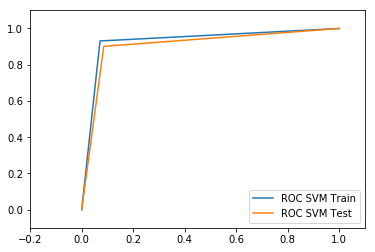

In [234]:
A=sklearn.metrics.roc_curve(y_train,gs_svm.predict(x_train),pos_label=1)
B=sklearn.metrics.roc_curve(y_test,gs_svm.predict(x_test),pos_label=1)

plt.plot(A[0],A[1],label='ROC SVM Train')
plt.plot(B[0],B[1],label='ROC SVM Test')
plt.xlim((-0.2,1.1))
plt.ylim((-0.1,1.1))
plt.legend(loc=4)

In [236]:
import pickle
filename = 'svm_model.sav'
pickle.dump(gs_svm, open(filename, 'wb'))